# Scraping and Sentiment Analysis of British Airways Reviews
In this project, we aim to analyze customer reviews of British Airways sourced from the Skytrax website. The project encompasses various aspects, including data scraping, cleaning, and analysis. The key steps involved are:
1. **Data Collection**: Using Python and BeautifulSoup to scrape reviews from the Skytrax website.
2. **Data Cleaning**: Removing unnecessary text, standardizing formats, and preparing the data for analysis.
3. **Sentiment Analysis**: Applying TextBlob to analyze the sentiment polarity of reviews and categorizing them as positive, negative, or neutral.
4. **Insights Exploration**:
   - Analyzing reviews based on sentiments.
   - Segmenting feedback by seat type (e.g., Economy, Business, etc.).
   - Identifying frequently mentioned destinations and associated sentiments.
   - Generating word cloud visualizations to reveal common themes or keywords in reviews.

The ultimate objective is to gain actionable insights from customer reviews to identify strengths and areas needing improvement in British Airways' services. These insights aim to strengthen customer satisfaction and loyalty while addressing complaints effectively.

The following sections provide the findings and detailed insights based on the collected and analyzed data.

## 1. Total Reviews analyzed
725 reviews were extracted, cleaned, and analyzed.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 40
page_size = 100

reviews = []

for i in range (1, pages +1):
    print(f"Scraping British Airways page: {i}")
    
    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    # Collect HTML data from this page
    response = requests.get(url)
    
    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping British Airways page: 1
   ---> 0 total reviews
Scraping British Airways page: 2
   ---> 0 total reviews
Scraping British Airways page: 3
   ---> 0 total reviews
Scraping British Airways page: 4
   ---> 0 total reviews
Scraping British Airways page: 5
   ---> 0 total reviews
Scraping British Airways page: 6
   ---> 0 total reviews
Scraping British Airways page: 7
   ---> 0 total reviews
Scraping British Airways page: 8
   ---> 0 total reviews
Scraping British Airways page: 9
   ---> 0 total reviews
Scraping British Airways page: 10
   ---> 0 total reviews
Scraping British Airways page: 11
   ---> 0 total reviews
Scraping British Airways page: 12
   ---> 0 total reviews
Scraping British Airways page: 13
   ---> 0 total reviews
Scraping British Airways page: 14
   ---> 0 total reviews
Scraping British Airways page: 15
   ---> 0 total reviews
Scraping British Airways page: 16
   ---> 100 total reviews
Scraping British Airways page: 17
   ---> 100 total reviews
Scraping British Ai

In [3]:
data = pd.DataFrame()
data["reviews"] = reviews
data

,reviews
0,✅ Trip Verified | I booked my flight with Cat...
1,✅ Trip Verified | Flew British Airways from Li...
2,✅ Trip Verified | Singapore to Heathrow. I ski...
3,✅ Trip Verified | Chicago to Chennai via Lond...
4,✅ Trip Verified | Flew London Heathrow to Toro...
...,...
720,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...
721,LHR to HAM. Purser addresses all club passenge...
722,My son who had worked for British Airways urge...
723,London City-New York JFK via Shannon on A318 b...


In [4]:
# Clean review texts by removing "Trip Verified" or "Not Verified"
data['reviews'] = data['reviews'].str.replace(r'\b(Not Verified|✅ Trip Verified)\b', '', regex=True).str.strip()
data

,reviews
0,✅ Trip Verified | I booked my flight with Cat...
1,✅ Trip Verified | Flew British Airways from Li...
2,✅ Trip Verified | Singapore to Heathrow. I ski...
3,✅ Trip Verified | Chicago to Chennai via Lond...
4,✅ Trip Verified | Flew London Heathrow to Toro...
...,...
720,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...
721,LHR to HAM. Purser addresses all club passenge...
722,My son who had worked for British Airways urge...
723,London City-New York JFK via Shannon on A318 b...


## 2. Sentiment Distribution:

In [5]:
# Add sentiment analysis columns
def analyze_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

data['sentiment'] = data['reviews'].apply(analyze_sentiment)

# Classify sentiment
conditions = [
    (data['sentiment'] > 0),
    (data['sentiment'] == 0),
    (data['sentiment'] < 0)
]
choices = ['positive', 'neutral', 'negative']
data['sentiment_category'] = pd.Categorical(np.select(conditions, choices, default='neutral'), categories=choices)

# Summarize data by sentiment
summary = data['sentiment_category'].value_counts()
sentiment_summary = summary.to_frame(name='count')
sentiment_summary

,count
sentiment_category,
positive,523
negative,201
neutral,1


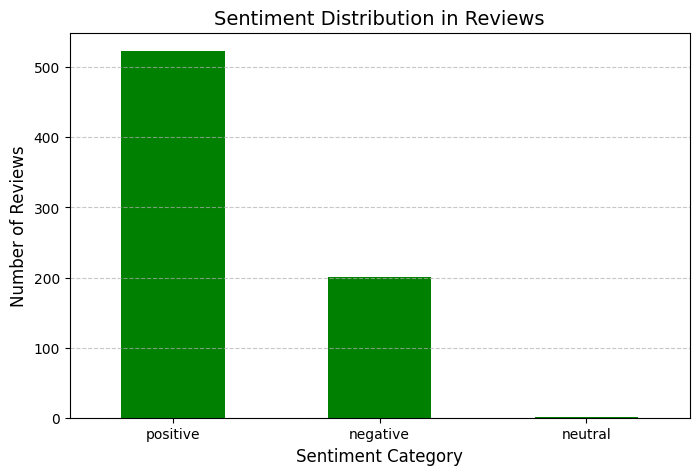

In [6]:
# Bar plot for sentiment distribution
import matplotlib.pyplot as plt

sentiment_summary.plot(kind='bar', legend=False, color=['green', 'blue', 'red'], figsize=(8, 5))
plt.title('Sentiment Distribution in Reviews', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Sentiment Category', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 3. Seat Type Sentiment Distribution:

In [7]:
# Filter reviews for mentions of seat types
seat_types = ['Economy', 'Premium Economy', 'Business', 'First Class', 'Club World']
seat_pattern = '|'.join(seat_types)
data['seat_type'] = data['reviews'].str.extract(f'({seat_pattern})', expand=False)
data_with_seat_types = data.dropna(subset=['seat_type'])
data_with_seat_types

,reviews,sentiment,sentiment_category,seat_type
3,✅ Trip Verified | Chicago to Chennai via Lond...,0.144444,positive,First Class
5,✅ Trip Verified | I flew British Airways from ...,-0.067551,negative,Club World
6,✅ Trip Verified | I flew British Airways from ...,0.225107,positive,Premium Economy
8,✅ Trip Verified | London to Istanbul. Flying i...,-0.157143,negative,Economy
10,✅ Trip Verified | Could British Airways get an...,-0.114015,negative,Club World
...,...,...,...,...
708,Las Vegas-LGW 777 3 class. Business. The uniqu...,0.068095,positive,Business
713,HKG-LHR in New Club World on Boeing 777-300 - ...,0.180657,positive,Club World
718,Business LHR to BKK. 747-400. First try back w...,0.047500,positive,Business
720,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,0.228030,positive,Club World


In [8]:
# Group sentiments by seat type
seat_sentiment_summary = data_with_seat_types.groupby(['seat_type', 'sentiment_category']).size().unstack(fill_value=0)
seat_sentiment_summary['Total'] = seat_sentiment_summary.sum(axis=1)
seat_sentiment_summary

/tmp/ipykernel_144/2904129134.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seat_sentiment_summary = data_with_seat_types.groupby(['seat_type', 'sentiment_category']).size().unstack(fill_value=0)


sentiment_category,positive,neutral,negative,Total
seat_type,,,,
Business,34,0,12,46
Club World,38,0,9,47
Economy,24,0,9,33
First Class,17,0,3,20
Premium Economy,14,0,8,22


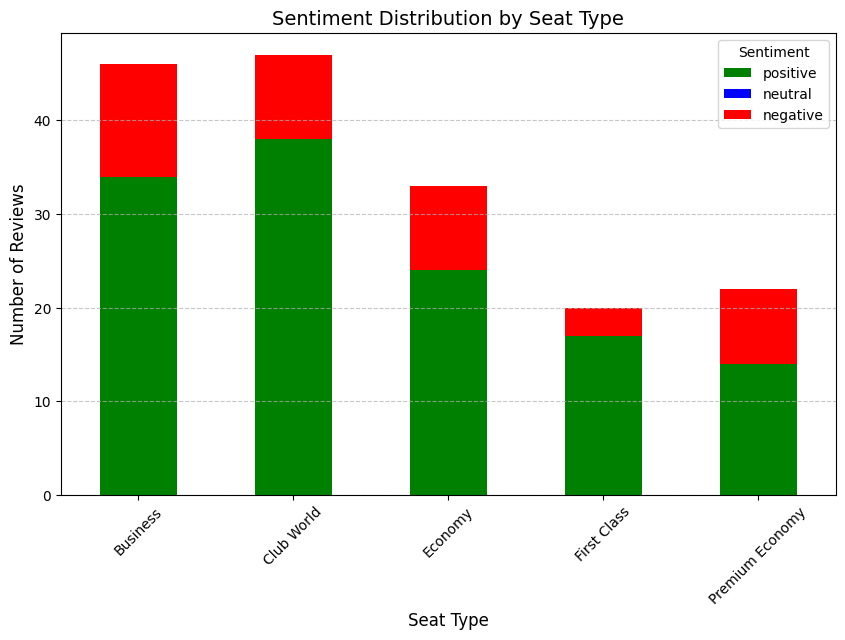

In [9]:
seat_sentiment_summary.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution by Seat Type', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Seat Type', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sentiment', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 4. Most Popular Destinations:

In [10]:
# Use common airport and city names to identify destinations mentioned in the reviews
from collections import Counter

# Define a list of common destinations (sample destinations; extend if needed)
potential_destinations = [
    'London', 'Paris', 'New York', 'Los Angeles', 'Singapore', 'Dubai',
    'Hong Kong', 'Bangkok', 'Sydney', 'Tokyo', 'Amsterdam', 'Rome', 'Venice',
    'San Francisco', 'Barcelona', 'Delhi', 'Istanbul', 'Toronto', 'Chicago', 'Miami'
]

# Extract mentioned destinations
mentioned_destinations = []
for review in data['reviews']:
    for destination in potential_destinations:
        if destination.lower() in review.lower():
            mentioned_destinations.append(destination)

# Count the most common destinations
destination_counts = Counter(mentioned_destinations)
common_destinations = pd.DataFrame(destination_counts.items(), columns=['keyword', 'frequency']).sort_values(by='frequency', ascending=False)
common_destinations

,keyword,frequency
0,London,368
1,Singapore,31
10,New York,24
8,Bangkok,20
9,Paris,19
11,Dubai,16
5,Miami,15
3,Toronto,14
12,Amsterdam,13
4,Hong Kong,12


In [11]:
# Map the most common destinations to reviews along with their sentiments
destination_sentiments = []

for review, sentiment in zip(data['reviews'], data['sentiment_category']):
    for destination in potential_destinations:
        if destination.lower() in review.lower():
            destination_sentiments.append({'destination': destination, 'sentiment': sentiment})

# Convert the extracted data to a DataFrame
destination_sentiment_df = pd.DataFrame(destination_sentiments)

# Group by destination and sentiment to analyze patterns
destination_sentiment_summary = destination_sentiment_df.groupby(['destination', 'sentiment']).size().unstack(fill_value=0)
destination_sentiment_summary['Total'] = destination_sentiment_summary.sum(axis=1)
destination_sentiment_summary

sentiment,negative,neutral,positive,Total
destination,,,,
Amsterdam,4,0,9,13
Bangkok,2,0,18,20
Barcelona,3,0,6,9
Chicago,4,0,6,10
Delhi,1,0,2,3
Dubai,9,0,7,16
Hong Kong,3,0,9,12
Istanbul,3,0,5,8
London,111,1,256,368


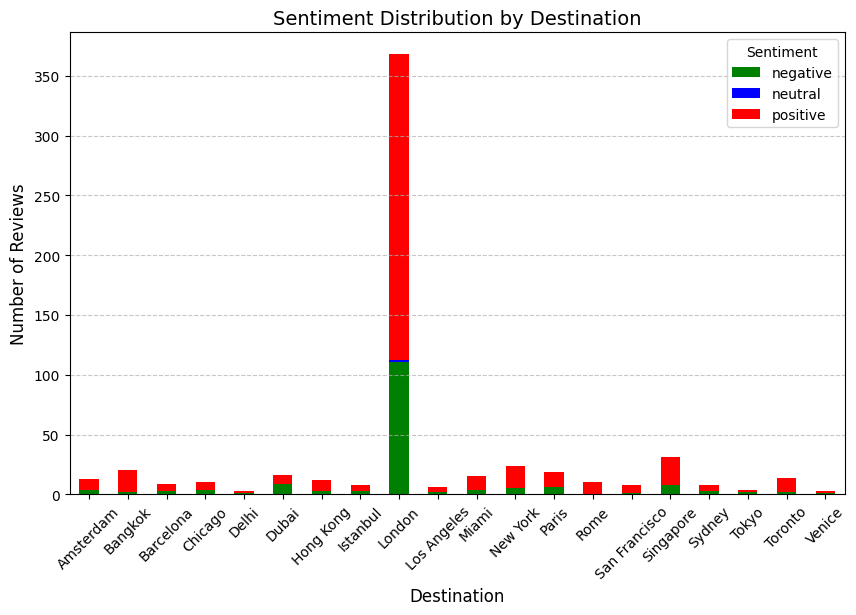

In [12]:
destination_sentiment_summary.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution by Destination', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sentiment', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 5. Word Cloud Analysis:

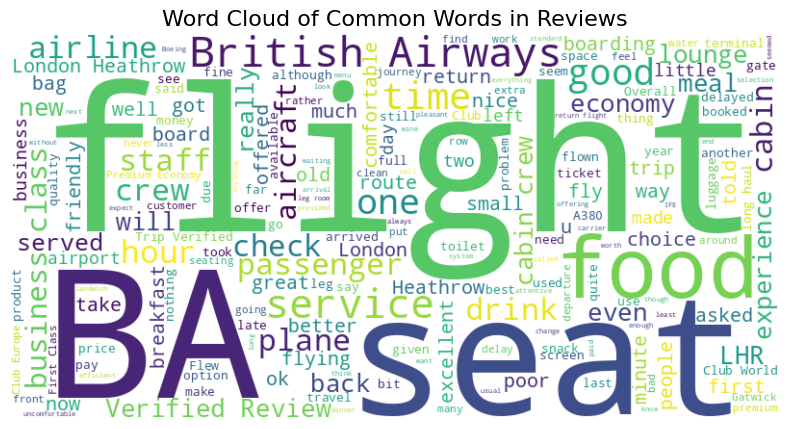

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all reviews into a single string
all_reviews = " ".join(data['reviews'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words in Reviews', fontsize=16)
plt.show()

## Overall Insights:

British Airways enjoys strong positive sentiment among its passengers, as indicated by the high percentage of positive reviews. However, there are significant areas to enhance the customer experience, particularly relating to specific seat types and negative customer experiences. Focus on improving the experience in "Premium Economy" and "Business" while addressing common issues raised in the negative reviews can strengthen customer satisfaction and loyalty further.

## Next Steps:
- Address recurring pain points in the negative reviews.
- Perform further segmentation for detailed insights, including flight routes and cabin services.
- Continuously monitor customer sentiment to track progress and effectiveness of improvements.
